## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

Solution: [homework.ipynb](homework.ipynb)

### Dataset

In this homework, we will use the Laptops price dataset from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

In [1]:
#%%bash
#wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('laptops.csv')

In [ ]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset 

First, we'll normalize the names of the columns:

In [ ]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

### EDA

* Look at the `final_price` variable. Does it have a long tail? 


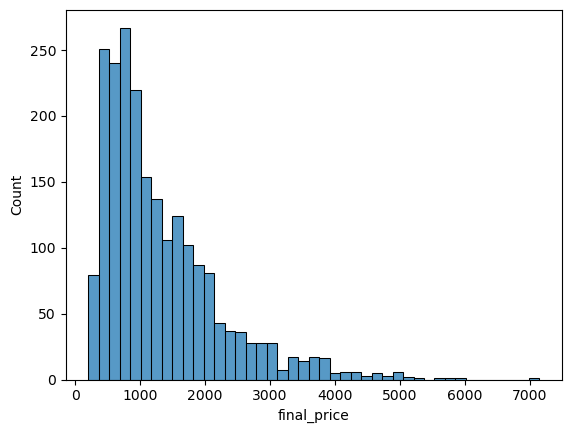

In [7]:
sns.histplot(df.final_price);

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [8]:
df[['ram','storage','screen','final_price']].isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [9]:
df=df[['ram','storage','screen','final_price']]

In [10]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32


In [11]:
df['ram'].median()

np.float64(16.0)




### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [12]:
n = len(df)

In [13]:
n_val = int(0.2*n)
n_test =int(0.2*n)
n_train =n-n_val-n_test

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(42)
np.random.shuffle(idx)


In [16]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

Fill with 0

In [18]:
def prepare_X(df, fill):
    df = df.copy()
    df = df.fillna(fill)
    X = df.values

    return X


In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [20]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [21]:
X_train = prepare_X(df_train,fill=0)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val,fill=0)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(597.3635593619622)

Fill with media

In [22]:
mean = df_train.screen.mean()
X_train = prepare_X(df_train,fill=mean)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val,fill=mean)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


np.float64(600.2650313748429)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [23]:

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
n = len(df)
n_val = int(0.2*n)
n_test =int(0.2*n)
n_train =n-n_val-n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

r = [0, 0.01, 0.1, 1, 5, 10, 100]

scores = []
for i in r:
  
    X_train = prepare_X(df_train,fill=0)

    w0, w = train_linear_regression_reg(X_train, y_train,i)

    X_val = prepare_X(df_val,fill=0)
    y_pred = w0 + X_val.dot(w)

    score=rmse(y_val, y_pred)
    scores.append(score)
    

In [25]:
c=list(zip(r,scores))
c

[(0, np.float64(597.3635593619622)),
 (0.01, np.float64(597.3616819856013)),
 (0.1, np.float64(597.345159296362)),
 (1, np.float64(597.2121215589519)),
 (5, np.float64(597.0111186297033)),
 (10, np.float64(597.0587680661115)),
 (100, np.float64(597.9032640603043))]

In [26]:
df_score=pd.DataFrame(c, columns=['r','Score'])

In [27]:
lista=[0,0.01,1,10,100]

In [28]:
df_score_lista = df_score[df_score.r.isin(lista)]

In [29]:
df_score_lista

,r,Score
0,0.00,597.363559
1,0.01,597.361682
3,1.00,597.212122
5,10.00,597.058768
6,100.00,597.903264


In [30]:
df_score_lista[(df_score_lista.Score==df_score_lista
                .Score.min())]

,r,Score
5,10.0,597.058768


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [31]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seeds

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
n = len(df)
n_val = int(0.2*n)
n_test =int(0.2*n)
n_train =n-n_val-n_test

scores=[]
for seed in seeds:
  
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train,fill=0)

    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val,fill=0)
    y_pred = w0 + X_val.dot(w)

    score=rmse(y_val, y_pred)
    scores.append(score)
    

In [33]:
std = np.std(scores)
round(std,3)

np.float64(29.176)

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60



In [34]:
n = len(df)
n_val = int(0.2*n)
n_test =int(0.2*n)
n_train =n-n_val-n_test


idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_train_full = pd.concat([df_train,df_val])
y_train_full = np.concatenate([y_train,y_val])

X_train_full= prepare_X(df_train_full,fill=0)

w0, w = train_linear_regression_reg(X_train_full, y_train_full,r=0.001)

X_test = prepare_X(df_test,fill=0)
y_pred = w0 + X_test.dot(w)

score=rmse(y_test, y_pred)
score

np.float64(608.609982204956)


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw02
* If your answer doesn't match options exactly, select the closest one